In [1]:
pip install pandas

In [2]:
pip install seaborn

In [3]:
pip install matplotlib

In [4]:
pip install scikit-learn

In [5]:
import pandas as pd

In [7]:
df=pd.read_csv(r'/content/Telco-Customer-Churn.csv')

In [8]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
print(df['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [9]:
print(df['Churn'].value_counts(normalize=True)*100)

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [10]:
import seaborn as sns

In [11]:
import matplotlib.pyplot as plt

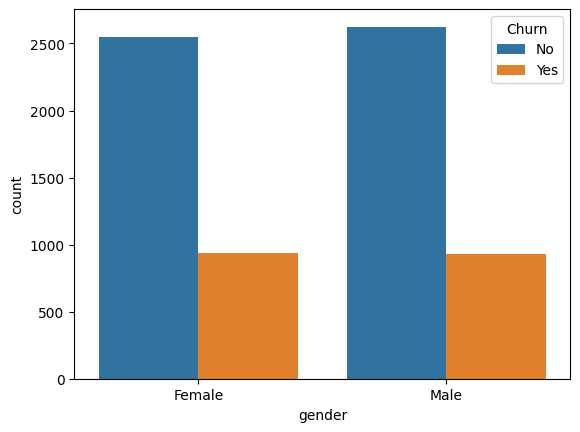

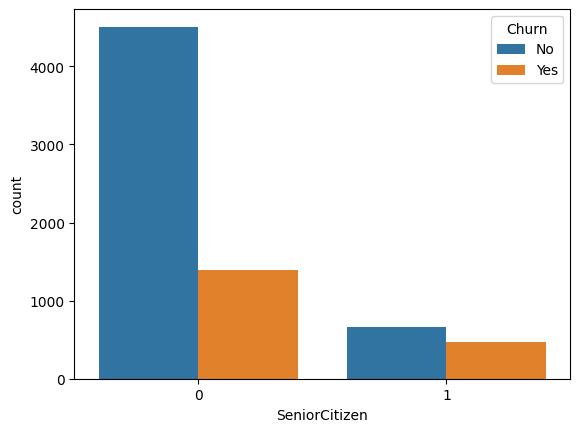

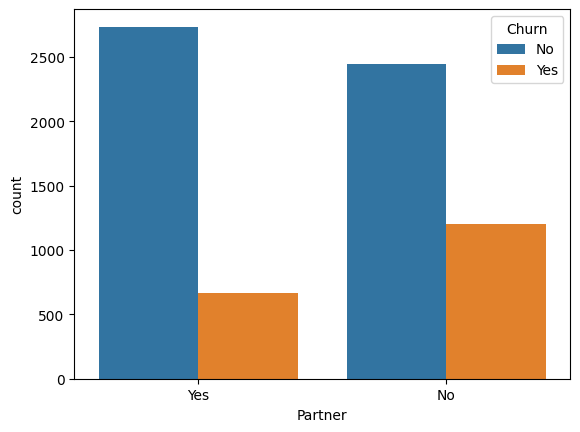

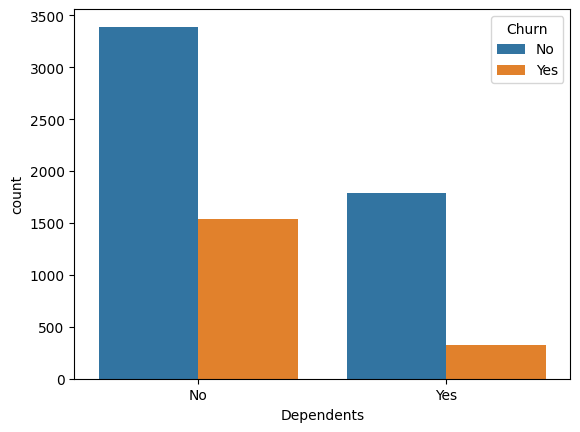

In [12]:
def plotss(a):
  sns.countplot(x=a,hue='Churn',data=df)
  plt.show()
plotss('gender')
plotss('SeniorCitizen')
plotss('Partner')
plotss('Dependents')

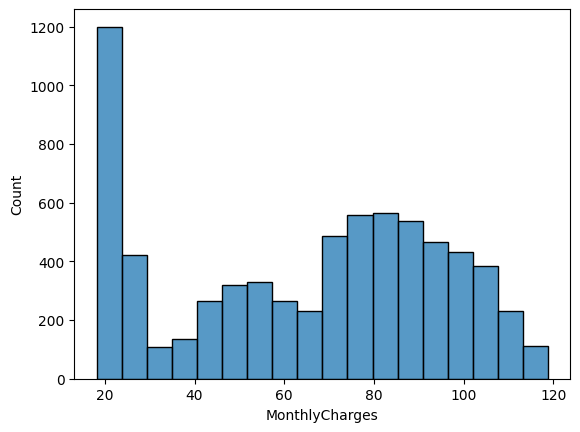

In [13]:
sns.histplot(df['MonthlyCharges'])
plt.show()

In [17]:
pip install numpy

In [16]:
import numpy as np

In [15]:
from scipy import stats

In [17]:
zscores=np.abs(stats.zscore(df['MonthlyCharges']))
dfclean=df[(zscores<3)]

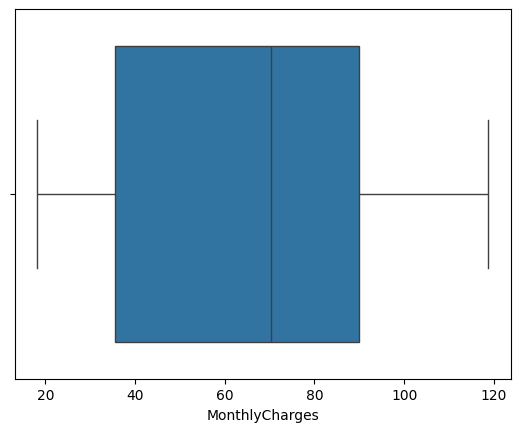

In [18]:
sns.boxplot(x=df['MonthlyCharges'])
plt.show()


In [19]:
print(f'Original size: {df.shape}, Cleaned size: {dfclean.shape}')

Original size: (7043, 21), Cleaned size: (7043, 21)


In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
for col in ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']:
  df[col]=LabelEncoder().fit_transform(df[col])

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x = df.drop('Churn', axis=1)
y = df['Churn']
xtrain, xtest, ytrain, ytest= train_test_split(x,y, test_size=0.2,random_state=42)

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(xtrain, ytrain)

ValueError: could not convert string to float: '4223-BKEOR'

In [26]:
df.drop('customerID', axis=1, inplace=True)


In [52]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [54]:
df = df[df['Churn'].notna()]

In [61]:
y = df['Churn']
X = df.drop('Churn', axis=1)

In [62]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [63]:
xtrain, xtest, ytrain, ytest= train_test_split(X_encoded,y, test_size=0.2,random_state=42)

In [72]:
model = DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=42)


In [73]:
model.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)

In [66]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [74]:
ypred = model.predict(xtest)

In [75]:
print("Accuracy:", accuracy_score(ytest, ypred))
print("Confusion Matrix:\n", confusion_matrix(ytest, ypred))
print("Classification Report:\n", classification_report(ytest, ypred))

Accuracy: 0.7452093683463449
Confusion Matrix:
 [[755 281]
 [ 78 295]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.73      0.81      1036
           1       0.51      0.79      0.62       373

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.75      0.76      1409

